In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

# Voting Classifiers 
## Weak Learning Over Large Numbers

Suppose you have a coin the is slightly biased towards heads (say 51%) of the time. This does not give you much of an advantage per flip, but what if you keep flipping the coin? If you toss 1,000 times you get 510 heads and 490 tails (if perfect). What about 10,000? The advantage keeps growing. So does an ensamble of weak predictors. 

In [3]:
heads_proba = 0.51 # the advatange
coin_tosses = (np.random.rand(10000, 10) < heads_proba).astype(np.int32) # 10,000 flips in a 10 column array 
cumulative_heads_ratio = np.cumsum(coin_tosses, axis=0) / np.arange(1, 10001).reshape(-1, 1)

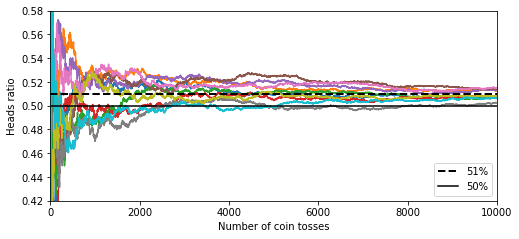

In [4]:
# plot each toss of the heads tails with advantage
# !0,000 flips, 10 times 
plt.figure(figsize=(8,3.5))
plt.plot(cumulative_heads_ratio)
plt.plot([0, 10000], [0.51, 0.51], "k--", linewidth=2, label="51%")
plt.plot([0, 10000], [0.5, 0.5], "k-", label="50%")
plt.xlabel("Number of coin tosses")
plt.ylabel("Heads ratio")
plt.legend(loc="lower right")
plt.axis([0, 10000, 0.42, 0.58])

plt.show()

As long as you bet on heads, you fill come out the champ over 10,000 tosses. Ensemble methods work best when the predictors are as independent from one another as possible. One way to get diverse classifiers is to train them using very different algorithms. This increases the chance that they will make very diferent types of erros, which improves the ensmble's accuracy. 

In [5]:
# train 3 classifiers using the moons data 
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC # support vector classifier

In [6]:
# Data set
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

# create and assign data to train and test
X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [7]:
# assign the different algorithms
log_clf = LogisticRegression() 
rnd_clf = RandomForestClassifier()
svc_clf = SVC()

# combine the outputs into a voting system classifier
voting_clf = VotingClassifier(
    estimators = [('lr', log_clf)
                 , ('rf', rnd_clf)
                 , ('svc', svc_clf)
                 ]
    , voting = 'hard' # voting hard 
)

voting_clf.fit(X_train, y_train)

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


VotingClassifier(estimators=[('lr', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)), ('rf', RandomFo...f', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False))],
         flatten_transform=None, n_jobs=None, voting='hard', weights=None)

In [8]:
# look at the accuracy of each and then the ensemble
from sklearn.metrics import accuracy_score
for clf in (log_clf, rnd_clf, svc_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.864
RandomForestClassifier 0.88
SVC 0.888
VotingClassifier 0.904


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: Fu

Okay so each classifier is very close in accuracy. Next we will do the same but using probabilities instead. This will require us to change some of the input parameters. SVC will need to be set to probability = true (this will slow down the system)

In [9]:
# same thing but with probabilities
log_clf = LogisticRegression(solver = "liblinear", random_state = 42)
rnd_clf = RandomForestClassifier(n_estimators = 10, random_state = 42)
svm_clf = SVC(gamma = "auto", probability = True, random_state = 42)

# create system
voting_clf = VotingClassifier(
    estimators=[('lr', log_clf)
                , ('rf', rnd_clf)
                , ('svc', svm_clf)
               ]
    , voting='soft' # changed voting to soft 
) 

voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=42, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)), ('rf', Rando...bf',
  max_iter=-1, probability=True, random_state=42, shrinking=True,
  tol=0.001, verbose=False))],
         flatten_transform=None, n_jobs=None, voting='soft', weights=None)

In [10]:
for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.864
RandomForestClassifier 0.872
SVC 0.888
VotingClassifier 0.912


Noe the Voting System outperforms the each of the other systems individually 

# Bagging and Pasting

Bagging and Pasting is using the same training algorithm for every predictor, by training them on different subsets of the training set. Bagging means that sampling has been performed WITH replacement. When sampling is performed WITHOUT replacement, it is called Pasting. Both methods allow training instances to be sampled several times across multiple predictors, Bagging allows the same instances to be sampled several time for the same predictor. Each individual predictor has a higher bias than if it were trained on the origional training set, but the aggregation reduces both bias and variance. When you use an enemble you end up with the same bias, but lower variance.

These predictors can be trained in parrallel, via differnent cores, which means that bagging and pasting will scale well.

In [11]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(
    DecisionTreeClassifier()
    , n_estimators = 500 # five hundered trees
    , max_samples = 100 # 100 samples per tree
    , bootstrap = True # set to false for pasting
    , n_jobs = 1
)

bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

The Bagging classifier automatically performs soft voting instead of hard voting if the base classifier can estimate class probabilities (if it has a predict_proba() method). This is truw for decision tree classifiers. 

In [12]:
# accuracy 
print(accuracy_score(y_test, y_pred))

0.92


Now compre the decision boundry of a single Decision tree vs the Bagging of 500 trees, both trained on the moons data set. Overall the ensemble (bagging) will generalize much better than a single tree. The ensemble will have a simliar bias but will have a lower variance (cleaner decision boundry). 

In [13]:
# single tree
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)

In [14]:
# Single tree vs Bagging
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[-1.5, 2.5, -1, 1.5], alpha=0.5, contour=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if contour:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", alpha=alpha)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", alpha=alpha)
    plt.axis(axes)
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)

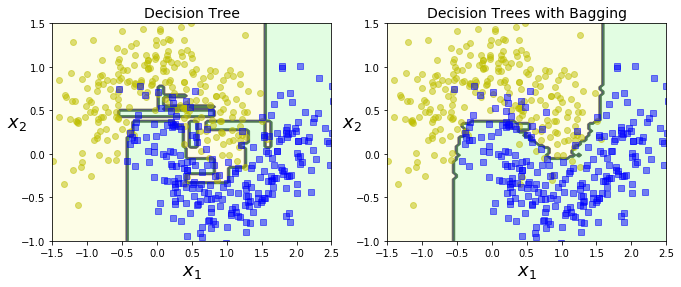

In [15]:
#plot 
plt.figure(figsize=(11,4))
plt.subplot(121)
plot_decision_boundary(tree_clf, X, y)
plt.title("Decision Tree", fontsize=14)
plt.subplot(122)
plot_decision_boundary(bag_clf, X, y)
plt.title("Decision Trees with Bagging", fontsize=14)

plt.show()

# Out-of-Bag Evaluation

With bagging, some instances may be sampled several times for any given predictor, while others may not be samples at all. BaggingClassifier samples 'm' training smaples with replacement (Bootstrap = True), where 'm' is the size of the training set. This means that while replacement, about 63% of the training instances are sampled on average (1-exp(-1) ~= 63%). The remaining 37% of training instances are not sampled. These are called Out-of-Bag instances. We can test our model using these instances with the oob_Score.

In [16]:
# check oob score
bag_clf = BaggingClassifier(
    DecisionTreeClassifier()
    , n_estimators = 500
    , bootstrap = True
    , n_jobs = 1
    , oob_score = True
)

bag_clf.fit(X_train, y_train)
bag_clf.oob_score_

0.8986666666666666

In [17]:
# verify model accuracy 
y_pred = bag_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.896

# Random Forest
## Optomized Decision Trees

In [18]:
# running 500 trees as a random forest

rnd_clf = RandomForestClassifier(n_estimators = 500
                                , max_leaf_nodes = 16
                                , n_jobs = 1)
rnd_clf.fit(X_train, y_train)

y_pred_rf = rnd_clf.predict(X_test)

Random forests have all the hyperparameters of decision trees and bagging classifiers to control the ensemble

In [19]:
# this is the same as adding random splitting to a bagging classifier

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(splitter = "random"
                          , max_leaf_nodes = 16)
    , n_estimators = 500
    , max_samples = 1.0
    , bootstrap = True
    , n_jobs = 1
) # same as random forest

## Feature Importance in Random Forest

Random Forests are great for measuring relative importance of features. SKLearn measures a features importance by looking at how much the tree nodes that use that feature reduce impurity on average (across all trees in the forest). It is a weighted average, where each node's weight is equal to the number of training samples that are asscoaited with it. SKLearn computes this score automatically for each feature after training, then it scales the results os that the sum of all importances is equal to 1. This can then be accese through feature_importance_

In [20]:
# using iris data set

from sklearn.datasets import load_iris
iris = load_iris()
rnd_clf = RandomForestClassifier(n_estimators = 500, n_jobs = -1, random_state = 42)
rnd_clf.fit(iris["data"], iris["target"])
for name, score in zip(iris["feature_names"], rnd_clf.feature_importances_):
    print(name, score)

sepal length (cm) 0.11249225099876374
sepal width (cm) 0.023119288282510326
petal length (cm) 0.44103046436395765
petal width (cm) 0.4233579963547681


In [21]:
# print as array 

rnd_clf.feature_importances_

array([0.11249225, 0.02311929, 0.44103046, 0.423358  ])

## Feature Importance on the MNST Data Set

In [22]:
# import MNST data 
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1)
mnist.target = mnist.target.astype(np.int64)

In [23]:
# train random forest
rnd_clf = RandomForestClassifier(n_estimators = 10, random_state = 42)
rnd_clf.fit(mnist["data"], mnist["target"]) # X and y

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [24]:
import matplotlib as mpl

In [25]:
# setting up feature importance plot
def plot_digit(data):
    image = data.reshape(28, 28) # convert each image into a 28x28 pixel matrix
    plt.imshow(image, cmap = mpl.cm.hot,
               interpolation = "nearest")
    plt.axis("off")

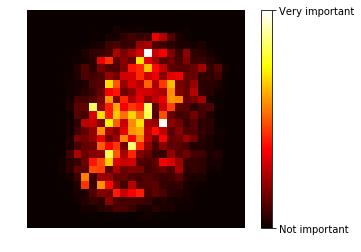

In [26]:
# plot

plot_digit(rnd_clf.feature_importances_)

cbar = plt.colorbar(ticks=[rnd_clf.feature_importances_.min(), rnd_clf.feature_importances_.max()])
cbar.ax.set_yticklabels(['Not important', 'Very important'])

plt.show()

# as you can see, the areas where we have pixel density are important 
# basically, where someone would write
# the rest in negative space

# Boosting
## Combine several weak learners into a strong learner

AdaBoost. The new predictor corrects its predecessor by paying more attensuon to the training instances that the predecessor underfitted. This results in new predictors focusing more and more on hard cases. A base classifier is trained on the training set. The relative weight of misclassified training instaces is then increased. A second classifier is trained using the updated weights and again makde new predictions. 

In [27]:
from sklearn.ensemble import AdaBoostClassifier

# training the base classifier

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth = 1), n_estimators = 200,
    algorithm = "SAMME.R", learning_rate = 0.5, random_state = 42)

ada_clf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=0.5, n_estimators=200, random_state=42)

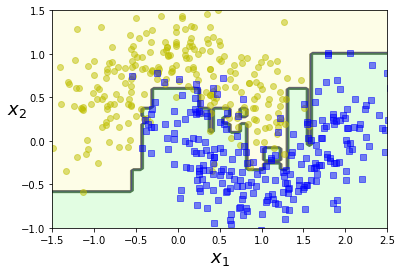

In [28]:
# primary base classifer prediction
plot_decision_boundary(ada_clf, X, y)

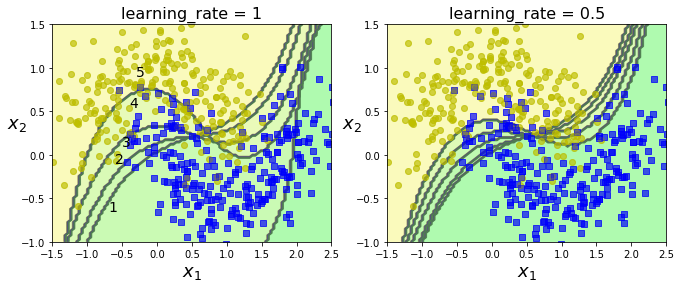

In [29]:
# iterating through the data set
m = len(X_train)

plt.figure(figsize = (11, 4))
for subplot, learning_rate in ((121, 1), (122, 0.5)):
    sample_weights = np.ones(m)
    plt.subplot(subplot)
    for i in range(5):
        
        # this time using support vector machines
        
        svm_clf = SVC(kernel = "rbf", C = 0.05, gamma = "auto", random_state = 42)
        svm_clf.fit(X_train, y_train, sample_weight = sample_weights)
        y_pred = svm_clf.predict(X_train)
        sample_weights[y_pred != y_train] *= (1 + learning_rate)
        plot_decision_boundary(svm_clf, X, y, alpha = 0.2)
        plt.title("learning_rate = {}".format(learning_rate), fontsize=16)
    if subplot == 121:
        plt.text(-0.7, -0.65, "1", fontsize=14)
        plt.text(-0.6, -0.10, "2", fontsize=14)
        plt.text(-0.5,  0.10, "3", fontsize=14)
        plt.text(-0.4,  0.55, "4", fontsize=14)
        plt.text(-0.3,  0.90, "5", fontsize=14)


plt.show()

The sequential learning technique has some similarties to gradient decent, except taht instead of tweaking a single predictor's parameters to minimize a cost function, AdaBoost adds predictors to the ensemble gradually making it better. There is one important draw back to this sequential learning technique: it cannot be parallelized, since each predictors can only be trained after the previous. 

Gradient Boosting works by sequentially adding predictors to an ensemble. Instead of tweaking the instances weights at every ineration (AdaBoost), Gradient Boosting tries to fit the new predictor to the residual erros made by the previous.

In [30]:
# Quadratic dataset
np.random.seed(42)
X = np.random.rand(100, 1) - 0.5
y = 3*X[:, 0]**2 + 0.05 * np.random.randn(100)

In [31]:
# Decision Tree Regressor as base predictor
from sklearn.tree import DecisionTreeRegressor

tree_reg1 = DecisionTreeRegressor(max_depth = 2, random_state = 42)
tree_reg1.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best')

In [32]:
# train a second tree regressor on the residual errors

y2 = y - tree_reg1.predict(X)
tree_reg2 = DecisionTreeRegressor(max_depth = 2)
tree_reg2.fit(X, y2)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [33]:
# train 3rd tree regressor on residuals

y3 = y2 - tree_reg2.predict(X)
tree_reg3 = DecisionTreeRegressor(max_depth = 2)
tree_reg3.fit(X, y3)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [34]:
# create some new instances for predictions
X_new = np.array([[0.8]])

In [35]:
# make predictions using new instances 
y_pred = sum(tree.predict(X_new) for tree in (tree_reg1, tree_reg2, tree_reg3))

Instead of writting all that code, we can use the Gradient Boosting (GBRT) ensemble from SKLearn. Like RandomForestRegressor, GBRT has hypers to control the growth of trees as well as the ensemble training.

In [36]:
from sklearn.ensemble import GradientBoostingRegressor

gbrt = GradientBoostingRegressor(max_depth = 2, n_estimators = 3, learning_rate = 1.0)
gbrt.fit(X, y)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=1.0, loss='ls', max_depth=2, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=3, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

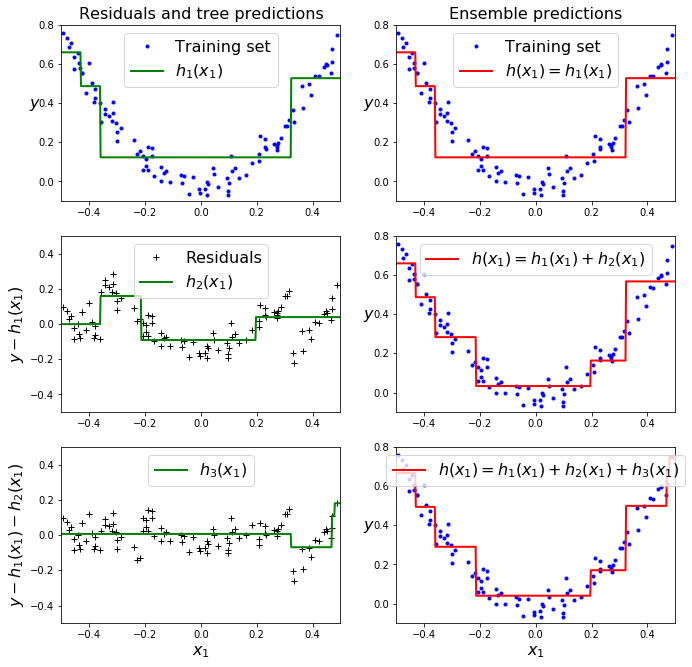

In [37]:
# compare plots
def plot_predictions(regressors, X, y, axes, label=None, style="r-", data_style="b.", data_label=None):
    x1 = np.linspace(axes[0], axes[1], 500)
    y_pred = sum(regressor.predict(x1.reshape(-1, 1)) for regressor in regressors)
    plt.plot(X[:, 0], y, data_style, label=data_label)
    plt.plot(x1, y_pred, style, linewidth=2, label=label)
    if label or data_label:
        plt.legend(loc="upper center", fontsize=16)
    plt.axis(axes)

plt.figure(figsize=(11,11))

plt.subplot(321)
plot_predictions([tree_reg1], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h_1(x_1)$", style="g-", data_label="Training set")
plt.ylabel("$y$", fontsize=16, rotation=0)
plt.title("Residuals and tree predictions", fontsize=16)

plt.subplot(322)
plot_predictions([tree_reg1], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h(x_1) = h_1(x_1)$", data_label="Training set")
plt.ylabel("$y$", fontsize=16, rotation=0)
plt.title("Ensemble predictions", fontsize=16)

plt.subplot(323)
plot_predictions([tree_reg2], X, y2, axes=[-0.5, 0.5, -0.5, 0.5], label="$h_2(x_1)$", style="g-", data_style="k+", data_label="Residuals")
plt.ylabel("$y - h_1(x_1)$", fontsize=16)

plt.subplot(324)
plot_predictions([tree_reg1, tree_reg2], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h(x_1) = h_1(x_1) + h_2(x_1)$")
plt.ylabel("$y$", fontsize=16, rotation=0)

plt.subplot(325)
plot_predictions([tree_reg3], X, y3, axes=[-0.5, 0.5, -0.5, 0.5], label="$h_3(x_1)$", style="g-", data_style="k+")
plt.ylabel("$y - h_1(x_1) - h_2(x_1)$", fontsize=16)
plt.xlabel("$x_1$", fontsize=16)

plt.subplot(326)
plot_predictions([tree_reg1, tree_reg2, tree_reg3], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h(x_1) = h_1(x_1) + h_2(x_1) + h_3(x_1)$")
plt.xlabel("$x_1$", fontsize=16)
plt.ylabel("$y$", fontsize=16, rotation=0)


plt.show()


In the first row, the ensemble has just one tree, so its predictions are exactly the same as the other. In the second row, a new tree is trained on the residual erros of the first tree. On the right you can see that the ensemble's predictions are equal to the sum of the predictions of the first two trees. In the third row another tree is trained on the residual errors of the second tree. The ensemble's predictions get better sd trees are added. 

The learning_rate hyper sacles the contribution of each tree. If you set it at a low value you will need more trees in the ensemble to fit the training set, but it will generalize better. In order to find the optimal number of trees you can use early stopping. A simple way to implement this is to use the staged_predict() method. Returning an iterator over the predictions made by the ensemble at each stage of training:

In [38]:
from sklearn.metrics import mean_squared_error

In [39]:
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=49)

gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=120, random_state=42)
gbrt.fit(X_train, y_train)

# numpy minimzation function
errors = [mean_squared_error(y_val, y_pred) 
          for y_pred in gbrt.staged_predict(X_val)]
bst_n_estimators = np.argmin(errors)

gbrt_best = GradientBoostingRegressor(max_depth=2,n_estimators=bst_n_estimators, random_state=42)
gbrt_best.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=2, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=55, n_iter_no_change=None, presort='auto',
             random_state=42, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [40]:
min_error = np.min(errors)

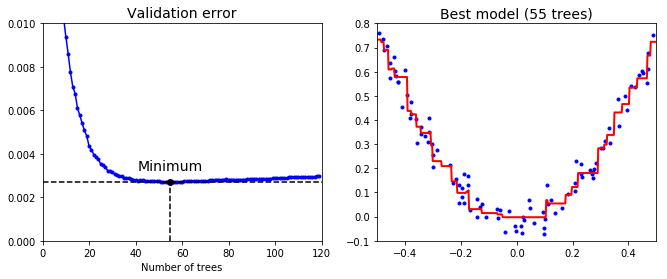

In [41]:
plt.figure(figsize=(11, 4))

plt.subplot(121)
plt.plot(errors, "b.-")
plt.plot([bst_n_estimators, bst_n_estimators], [0, min_error], "k--")
plt.plot([0, 120], [min_error, min_error], "k--")
plt.plot(bst_n_estimators, min_error, "ko")
plt.text(bst_n_estimators, min_error*1.2, "Minimum", ha="center", fontsize=14)
plt.axis([0, 120, 0, 0.01])
plt.xlabel("Number of trees")
plt.title("Validation error", fontsize=14)

plt.subplot(122)
plot_predictions([gbrt_best], X, y, axes=[-0.5, 0.5, -0.1, 0.8])
plt.title("Best model (%d trees)" % bst_n_estimators, fontsize=14)

plt.show()

It is also possible to use Early Stopping before running a bunch of trees and then looking back. By setting the warm_start=True you use incremental training. The code will stop training if the valiadation error DOES NOT IMPORVE for 'n' interations:

In [42]:
gbrt = GradientBoostingRegressor(max_depth = 2, warm_start = True) # we will tell it how many iterations to use

min_val_error = float("inf")
error_going_up = 0
for n_estimators in range(1, 120):
    gbrt.n_estimators = n_estimators
    gbrt.fit(X_train, y_train)
    y_pred = gbrt.predict(X_val)
    val_error = mean_squared_error(y_val, y_pred)
    # if validation does not get better after 5 iterations then break 
    if val_error < min_val_error:
        min_val_error = val_error
        error_going_up = 0
    else:
        error_going_up += 1
        if error_going_up == 5:
            break # early stopping

In [43]:
print(gbrt.n_estimators)

61


In [44]:
print("Minimum validation MSE:", min_val_error)

Minimum validation MSE: 0.002712853325235463


We can use Stochastic Gradient Boosting by randomly subsetting the data using the subsample=n hyper. This trades a higher bias for a lower variance. This speeds up training considerably. 